# Keras demo for L715

## Import the library

* Import **TensorFlow**
 * Wait... What is **TensorFlow**?
  * TensorFlow is an open-source machine learning library for research and production. 
  * TensorFlow offers APIs for beginners and experts to develop for desktop, mobile, web, and cloud.
  * Useful links:
   * https://www.tensorflow.org/
   * https://www.tensorflow.org/tutorials/representation/word2vec
   



In [0]:
import tensorflow as tf

* Import **Keras**
 * What? I thought we are talking about TensorFlow?
 * The high-level Keras API provides building blocks to create and train deep learning models. (Like LEGOs?)
 * Keras is much easier to start with than plain TensorFlow, but if you want to do something with Keras that doesn't come out of the box, it will be harder to implement that.
 * TensorFlow, on the other hand, allows you to create any arbitrary computational graph, providing much more flexibility. If you are doing more research work, TensorFlow is the route to go due to this flexibility.

In [0]:
from tensorflow import keras

## Load the dataset

* Download the IMDB dataset
 * Let's see how Keras performs on the same dataset compared to scikit-learn. :)
 

In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

* Stop right there!
 * How do you know the dataset is there?
   * Typically these kind of learning libraries come with several datasets for people to get started or play with.
 * And... how do you know you need to write a code block like that to get the dataset?
   * https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
 

## Explore the dataset

* OK... but how do the data look like?

In [0]:
print("Training entries: {}, labels: {}".format(len(train_data),len(train_labels)))

print(train_data[0])

Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


* What are those numbers?
 * x_train, x_test: list of sequences, which are lists of indices (integers).
 * So... exactly what are those?
  * This is only for curiosity purposes... In fact, you almost always will have to prepare the data yourself.



In [0]:
################################################################################

# Convert the integers back to words
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

################################################################################

print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

* We'll discuss this block of code if we have time. For now, let's move on.

In [0]:
print(len(train_data[0]),len(train_data[1]))

218 189


## Preparing the data

* They are of different lengths. What do we do?

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

* What's that?
  * **Padding**. :)
* How do you know this padding technique?
  * Read papers and play with code other people wrote.
* How do you know the **arguments**?
  * https://keras.io/preprocessing/sequence/
* How do you know the **values** for the arguments?
 * That's pretty empirical... You'll have to try (or see how others do it).
* So... how do they look now?

In [0]:
print(len(train_data[0]))

print(len(train_data[1]))

print(train_data[0])

print(decode_review(train_data[0]))

256
256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

## Build the model

* Let's build a model! (Yes, finally... Data cleaning is tedious work...)
* OK... Where do we start?
  * Honestly? Let's steal somebody else's model and try first.
 
* Let's start with something really simple -- a sequential model.
  * All layers are just stacked. Nothing fancy.
  * https://keras.io/getting-started/sequential-model-guide/

In [0]:
model = keras.Sequential()

* The first layer is an Embedding layer. 
 * This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. 
  * These vectors are learned as the model trains. 
  * The vectors add a dimension to the output array. 
  * The resulting dimensions are: (batch, sequence, embedding).
  * https://keras.io/layers/embeddings/

In [0]:
vocab_size = 10000

model.add(keras.layers.Embedding(vocab_size, 16))

* A GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
  * https://keras.io/layers/pooling/

In [0]:
model.add(keras.layers.GlobalAveragePooling1D())

* This fixed-length output vector is piped through a fully-connected layer with 16 hidden units.
  * https://keras.io/layers/core/

In [0]:
model.add(keras.layers.Dense(16, activation=tf.nn.relu))

* The last layer is densely connected with a single output node. 
* Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.
  * Why? --> [Common activation functions](https://qph.fs.quoracdn.net/main-qimg-d131b1b1ffb1ae9d842e135f05635f1c)

In [0]:
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

## Review the model

* Let's see how our model looks.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## Optimize the model

* So... We have a model now. 
 * How do we find out the best set of parameters?
    * Optimize using a loss function.
      * Optimizers: https://keras.io/optimizers/
        * [Haddling the saddle point](https://i.stack.imgur.com/gjDzm.gif)
      * Loss function:
        * Losses: https://keras.io/losses/

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Create a validation set

* We need a validation set to see how well we do.

In [0]:
x_val = train_data[:10000]

partial_x_train = train_data[10000:]

y_val = train_labels[:10000]

partial_y_train = train_labels[10000:]

## Let's train the model!

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 83us/sample - loss: 0.6914 - acc: 0.5734 - val_loss: 0.6889 - val_acc: 0.6213
Epoch 2/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6842 - acc: 0.7113 - val_loss: 0.6789 - val_acc: 0.7402
Epoch 3/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6680 - acc: 0.7591 - val_loss: 0.6584 - val_acc: 0.7545
Epoch 4/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6405 - acc: 0.7677 - val_loss: 0.6278 - val_acc: 0.7580
Epoch 5/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6023 - acc: 0.7935 - val_loss: 0.5891 - val_acc: 0.7861
Epoch 6/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.5567 - acc: 0.8161 - val_loss: 0.5465 - val_acc: 0.8086
Epoch 7/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.5082 - acc: 0.8337 - val_loss: 0.

## Evaluate the model

* So... Exactly how well did we do?

In [0]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 45us/sample - loss: 0.3326 - acc: 0.8713
[0.33261517679691316, 0.87132]


## How do you know...?

* What is the best architecture and hyperparameters?
  * That's like **the ultimate** research question. 
  * Something a bit more intelligient:
    * [**NOT** Everything you need to know about AutoML and Neural Architecture Search](https://towardsdatascience.com/everything-you-need-to-know-about-automl-and-neural-architecture-search-8db1863682bf)
    * [AdaNet](https://github.com/tensorflow/adanet)
    * [AutoKeras](https://autokeras.com/)

## Visualize it!

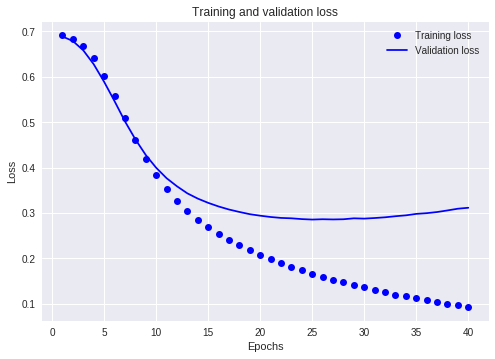

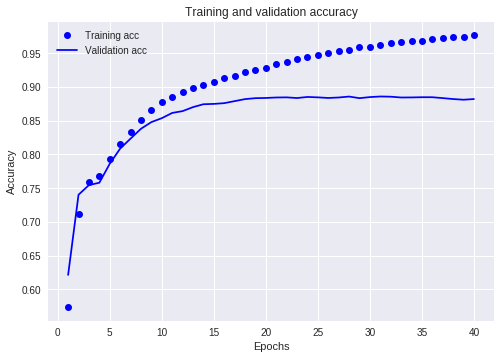

In [0]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()